# Iris classfication with Support Vector Machine

In [17]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [18]:
iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Plotting the dataset

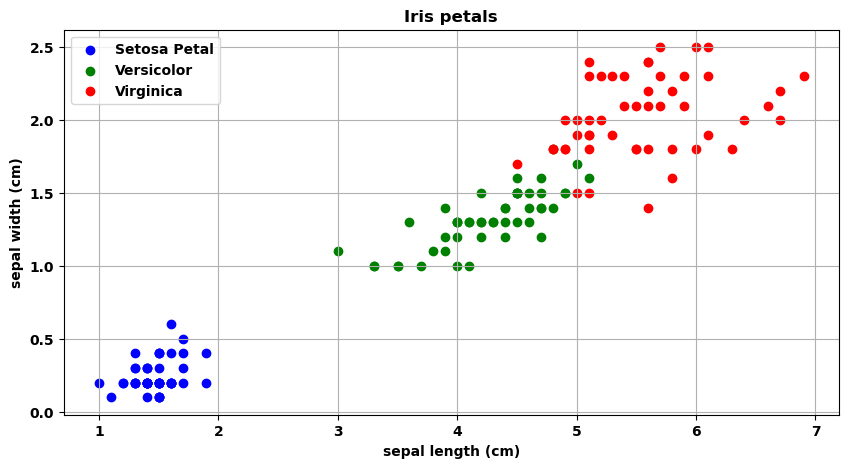

In [20]:
setosa = iris[iris.Species == 'Iris-setosa']
versicolor = iris[iris.Species == 'Iris-versicolor']
virginica = iris[iris.Species == 'Iris-virginica']

fig, ax = plt.subplots()
fig.set_size_inches(10,5) 

# laels and scatter points
ax.scatter(setosa['PetalLengthCm'], setosa['PetalWidthCm'], label="Setosa Petal", facecolor="blue")
ax.scatter(versicolor['PetalLengthCm'], versicolor['PetalWidthCm'], label="Versicolor", facecolor="green")
ax.scatter(virginica['PetalLengthCm'], virginica['PetalWidthCm'], label="Virginica", facecolor="red")

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

### Train test split

In [21]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
X = iris.drop(['SepalLengthCm','SepalWidthCm','Species'], axis=1)
y = iris.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (67, 3)
X_test shape:  (83, 3)
y_train shape:  (67,)
y_test shape:  (83,)


,Id,PetalLengthCm,PetalWidthCm
0,1,1.4,0.2
1,2,1.4,0.2
2,3,1.3,0.2
3,4,1.5,0.2
4,5,1.4,0.2
...,...,...,...
145,146,5.2,2.3
146,147,5.0,1.9
147,148,5.2,2.0
148,149,5.4,2.3


### Training and testing the SVC classifier

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

kernels = ['linear', 'rbf', 'poly']
X_train_np = X_train.to_numpy()
# Loop through different kernel types
for kernel in kernels:
    # Create an SVM model with the current kernel
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # Compute accuracy, confusion matrix, and classification report
    acc = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)

    # Print accuracy, classification report, and confusion matrix
    print("==================================================================")
    print("Accuracy: ", acc)
    print("Using kernel : {}".format(kernel))
    print(report)
    print(conf_matrix)


Accuracy:  1.0
Using kernel : linear
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        32
Iris-versicolor       1.00      1.00      1.00        26
 Iris-virginica       1.00      1.00      1.00        25

       accuracy                           1.00        83
      macro avg       1.00      1.00      1.00        83
   weighted avg       1.00      1.00      1.00        83

[[32  0  0]
 [ 0 26  0]
 [ 0  0 25]]
Accuracy:  0.963855421686747
Using kernel : rbf
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        32
Iris-versicolor       0.90      1.00      0.95        26
 Iris-virginica       1.00      1.00      1.00        25

       accuracy                           0.96        83
      macro avg       0.97      0.97      0.97        83
   weighted avg       0.97      0.96      0.96        83

[[29  3  0]
 [ 0 26  0]
 [ 0  0 25]]
Accuracy:  0.963855421686747
Using ke